In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv('delivery.csv')

df.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


### Column 
```SERIAL_NUMBER	순번
PROCESS_DT	처리일시
DLVR_RQESTER_ID	배달요청업체 ID
DLVR_REQUES_STTUS_VALUE	배달요청상태값(1:완료, 2:취소, 3:사고, 4:문의)
DLVR_RCEPT_CMPNY_ID	배달접수회사 ID
DLVR_STORE_ID	배달상점id
DLVR_STORE_INDUTY_NM	배달상점 업종이름
DLVR_STORE_LEGALDONG_CODE	배달상점 주소 법정동코드
DLVR_STORE_SIDO	배달상점 주소 법정동 시도명
DLVR_STORE_SIGUNGU	배달상점 주소 법정동 시군구명
DLVR_STORE_DONG	배달상점 주소 법정동 읍면동명
DLVR_STORE_RI	배달상점 주소 법정동 리명
DLVR_STORE_ADSTRD_CODE	배달상점 주소 행정동 코드
DLVR_STORE_RDNMADR_CODE	배달상점 주소 도로명 주소 코드
DLVR_DSTN_LEGALDONG_CODE	배달목적지 주소 법정동코드
DLVR_DSTN_SIDO	배달목적지 주소 법정동 시도명
DLVR_DSTN_SIGUNGU	배달목적지 주소 법정동 시군구명
DLVR_DSTN_DONG	배달주소 목적지  법정동 읍면동명
DLVR_DSTN_RI	배달목적지 주소 법정동 리명
DLVR_DSTN_ADSTRD_CODE	배달목적지 주소 행정동 코드
DSVR_DSTN_RDNMADR_CODE	배달목적지주소 도로명주소 코드
DLVR_MAN_ID	배달기사 ID
DLVR_AMOUNT	배달비용
CALL_RLAY_FEE_AMOUNT	호출중계수수료금액
GOODS_AMOUNT	배달상품금액
SETLE_KND_VALUE	결제종류번호 (1:카드, 2:선불, 3:현금)
SETLE_CARD_CN	결제카드종류
DLVR_RCEPT_TIME	배달접수시간
DLVR_CARALC_TIME	배달배차시간
DLVR_COMPT_TIME	배달완료시간
DLVR_CANCL_TIME	배달취소시간
```

## 분석 주제

- 배달기사님들의 수익은 어느정도일까?
    - 수익 분포 (배달기사님들별로 천차만별인가?)
        - 차이가 난다면 얼마나 나는가?
            - 지역별 특성이 클까 배달수행역량에 따른 특성이 클까? 등..
            
            
- 기사들이 어떤 배달대행회사에서 일하는지 구분하지 않고 전반적인 배달기사들의 수익 파악

## 데이터 확인
- 컬럼별 결측치 확인

In [2]:
df.isnull().sum()

SERIAL_NUMBER                      0
PROCESS_DT                         0
DLVR_RQESTER_ID                    0
DLVR_REQUST_STTUS_VALUE            0
DLVR_RCEPT_CMPNY_ID            62894
DLVR_STORE_ID                      0
DLVR_STORE_INDUTY_NM               0
DLVR_STORE_LEGALDONG_CODE          0
DLVR_STORE_SIDO                    0
DLVR_STORE_SIGUNGU                 0
DLVR_STORE_DONG                    0
DLVR_STORE_RI                4567428
DLVR_STORE_ADSTRD_CODE             0
DLVR_STORE_RDNMADR_CODE        99621
DLVR_DSTN_LEGALDONG_CODE      389543
DLVR_DSTN_SIDO                389543
DLVR_DSTN_SIGUNGU             389543
DLVR_DSTN_DONG                389543
DLVR_DSTN_RI                 4756752
DLVR_DSTN_ADSTRD_CODE         383887
DLVR_DSTN_RDNMADR_CODE        600821
DLVR_MAN_ID                        0
DLVR_AMOUNT                        0
CALL_RLAY_FEE_AMOUNT               0
GOODS_AMOUNT                       0
SETLE_KND_VALUE                    0
SETLE_CARD_CN                3541335
D

- 배달접수회사정보, 도착지 정보, 결제카드 정보, 배달 시간 관련한 정보들이 상당 수 비어있음
    - 내가 분석하고자 하는 배달기사 수익 분포 파악 관점에서는 크게 문제 없을 듯
    - 결제카드 정보는 현금건 때문에 그럴 가능성 있음

### 데이터 처리 
- 필요한 컬럼만 남기기 (기사의 배송 수익과 관련된 컬럼)
- 사용하기 쉬운 컬럼명으로 변경 

In [3]:
delivery = df[['DLVR_REQUST_STTUS_VALUE', 'DLVR_STORE_ID', 'DLVR_STORE_INDUTY_NM',
               'DLVR_STORE_SIDO', 'DLVR_STORE_SIGUNGU', 'DLVR_MAN_ID', 'DLVR_AMOUNT', 
               'DLVR_RCEPT_TIME', 'DLVR_CARALC_TIME', 'DLVR_COMPT_TIME', 'DLVR_CANCL_TIME'
              ]].rename(
                columns={'DLVR_REQUST_STTUS_VALUE':'delivery_status', 'DLVR_STORE_ID':'store_id',
                         'DLVR_STORE_INDUTY_NM':'category','DLVR_STORE_SIDO':'store_sido', 'DLVR_STORE_SIGUNGU' : 'store_sigungu',
                         'DLVR_MAN_ID':'rider_id', 'DLVR_AMOUNT':'rider_amt', 'DLVR_RCEPT_TIME':'receive_time', 
                         'DLVR_CARALC_TIME':'dispath_time','DLVR_COMPT_TIME':'complete_time', 'DLVR_CANCL_TIME':'cancel_time'
            })

In [4]:
delivery.columns

Index(['delivery_status', 'store_id', 'category', 'store_sido',
       'store_sigungu', 'rider_id', 'rider_amt', 'receive_time',
       'dispath_time', 'complete_time', 'cancel_time'],
      dtype='object')

In [5]:
delivery.head()

,delivery_status,store_id,category,store_sido,store_sigungu,rider_id,rider_amt,receive_time,dispath_time,complete_time,cancel_time
0,1,S0032342,치킨,경상남도,창원시 마산회원구,D0005271,4290,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,1,S0021847,찜탕,경기도,광명시,D0003269,4800,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,1,S0025740,치킨,서울특별시,은평구,D0001536,3300,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,1,S0039634,한식,경기도,의정부시,D0005061,4500,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,1,S0002237,한식,경기도,고양시 덕양구,D0005215,6500,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


### 기초 분석
- 데이터 기간
- 배달비용 distribution

In [6]:
# 접수 시간을 기준으로 데이터 기간 파악
min_receive = delivery['receive_time'].min()
max_receive = delivery['receive_time'].max()
print(f'최소 접수 시간 -> {min_receive}')
print(f'최대 접수 시간 -> {max_receive}')

최소 접수 시간 -> 2020-01-01 00:00:02
최대 접수 시간 -> 2020-06-21 23:59:55


In [7]:
# 기사 배달 비용 파악
min_amt = delivery['rider_amt'].min()
max_amt = delivery['rider_amt'].max()
print(f'최소 배달비용 -> {min_amt}')
print(f'최대 배달비용 -> {max_amt}')

최소 배달비용 -> 0
최대 배달비용 -> 202100


기사의 수익을 보고 싶은 것이기 때문에 배달비용이 이상한 outlier들은 제거가 필요함

In [48]:
delivery['rider_amt_refine'] = (delivery['rider_amt']/1000).apply(np.floor) * 1000
# tempDF['int_measure'] = tempDF['measure'].apply(np.floor)

In [49]:
delivery['rider_amt_refine']

0          4000.0
1          4000.0
2          3000.0
3          4000.0
4          6000.0
5          3000.0
6          3000.0
7          3000.0
8          4000.0
9          3000.0
10         4000.0
11         3000.0
12         3000.0
13         4000.0
14         3000.0
15         3000.0
16         4000.0
17         3000.0
18         3000.0
19         3000.0
20         4000.0
21         3000.0
22         5000.0
23         3000.0
24         3000.0
25         4000.0
26         4000.0
27         4000.0
28         5000.0
29         4000.0
            ...  
5158294    3000.0
5158295    3000.0
5158296    3000.0
5158297    3000.0
5158298    3000.0
5158299    3000.0
5158300    3000.0
5158301    4000.0
5158302    3000.0
5158303    4000.0
5158304    5000.0
5158305    5000.0
5158306    3000.0
5158307    3000.0
5158308    3000.0
5158309    5000.0
5158310    4000.0
5158311    3000.0
5158312    3000.0
5158313    4000.0
5158314    4000.0
5158315    3000.0
5158316    3000.0
5158317    3000.0
5158318   

20년 1월 ~ 6월까지 대략 6개월 정도의 데이터 

- 월별 데이터 개수 파악

- 카테고리, 지역, 거리(걸리는 시간으로 대체)별 수익

- 시간당 평균, 월급

In [29]:

delivery['receive_month'] = pd.DatetimeIndex(delivery['receive_time']).month

In [30]:
delivery.head()

,delivery_status,store_id,category,store_sido,store_sigungu,rider_id,rider_amt,receive_time,dispath_time,complete_time,cancel_time,receive_month
0,1,S0032342,치킨,경상남도,창원시 마산회원구,D0005271,4290,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN,1
1,1,S0021847,찜탕,경기도,광명시,D0003269,4800,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN,1
2,1,S0025740,치킨,서울특별시,은평구,D0001536,3300,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN,1
3,1,S0039634,한식,경기도,의정부시,D0005061,4500,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN,1
4,1,S0002237,한식,경기도,고양시 덕양구,D0005215,6500,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN,1


In [35]:
monthly_delivery = delivery[['receive_month', 'delivery_status']].groupby(by=['receive_month'], as_index=False) \
                .count() \
                .head(10)

In [38]:
print(monthly_delivery)
print('총 배달건수 {}'.format(len(delivery)))

   receive_month  delivery_status
0              1           824058
1              2           895861
2              3           971131
3              4           967309
4              5          1023593
5              6           476372
총 배달건수 5158324


- 6월 데이터가 전체가 아닌 것 같으니 월별 수익을 볼 거면 6월은 제외해야 함
- 또한 배달비가 0원인 것과 너무 현실과 동떨어지게 큰 배달비용은 노이즈로 보고 제거 

In [73]:
d = delivery[(delivery['rider_amt_refine'] > 0) & (delivery['rider_amt_refine'] < 10000)]

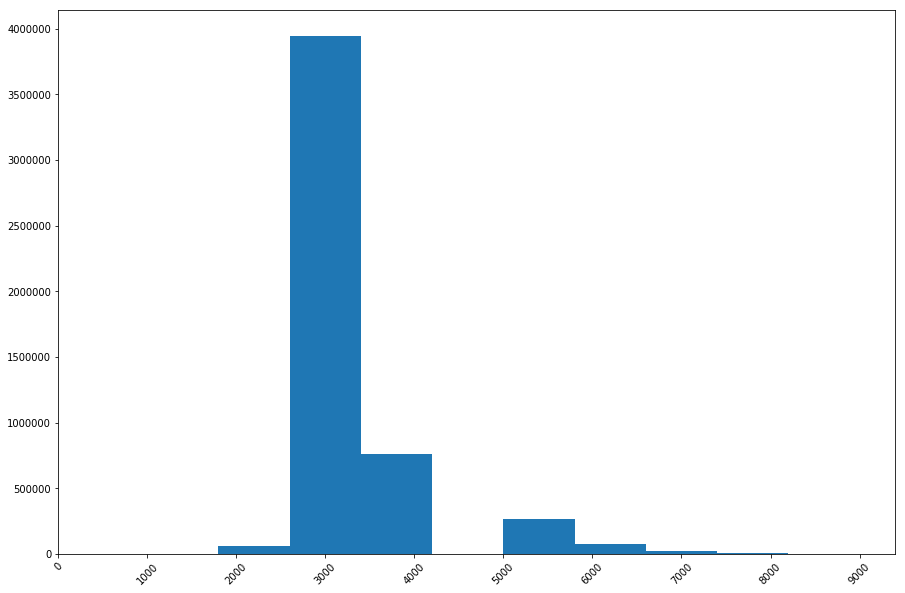

In [82]:
plt.figure(figsize=(15, 10))
plt.hist(d['rider_amt_refine'], bins=10)
plt.xticks(np.arange(0, 10000, 1000), rotation=45)
plt.show()

- 거의 대부분의 배달비용이 3000원대이고 이 가격대가 시장에서의 표준 가격대임을 유추해볼 수 있음
- 우리가 배달음식을 시켜먹을 때 배달비용으로 지불할 수 있는 최대 마지노선으로도 볼 수 있음